In [17]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np

df = pd.read_csv('data/haberman.csv')
column_names = ['age', 'year of operation', 'positive axillary nodes', 'survival status']
#Age of patient at time of operation
#Patient's year of operation
#A positive axillary lymph node is a lymph node in the area of the armpit (axilla) to which cancer has spread.
# Survival status 
         #1 = the patient survived 5 years or longer
         #2 = the patient died within 5 year
#print(df)
df['survival_status'] = df['survival_status'].map({1:1,2: -1})
#print(df.columns)
#data = df.to_numpy()
#print(data)

class_labels = df['survival_status'].to_numpy()

#print('class labels',class_labels)

age_data = np.array(df['age'])
#print('age data',age_data)
year_of_operation_data = df['year_of_operation'].to_numpy()
#print('year data', year_of_operation_data)
positive_axillary_nodes_data = df['positive_axillary_nodes'].to_numpy()

age_training_data = [(np.array([d]), l) for d, l in zip(age_data, class_labels)]
age_year_training_data = [(np.array([ad, yd]), l) for ad, yd, l in zip(age_data, year_of_operation_data, class_labels)]
age_year_ax_training_data = [(np.array([ad, yd, axd]), l) for ad, yd, axd, l 
                             in zip(age_data, year_of_operation_data, positive_axillary_nodes_data, class_labels)]
year_ax_training_data = [(np.array([yd, axd]), l) for yd, axd, l in zip(year_of_operation_data, positive_axillary_nodes_data, class_labels)]

print('age training data',age_training_data[:10])
print('age_year training data', age_year_training_data[:10])
print('age_year_ax data ', age_year_ax_training_data[:10])


def activation_function(x):
    """
    Step function to respond with y = 1 or -1
    Parameter:
    x: An x (numeric) value that will have a corresponding y value of 1 or -1
    """
    if x < 0:
        return -1
    else:
        return 1
    
def perceptron(inp, weights):
    """
    Given a list of feature (x) values and a list of weights, 
    calculates the dot product of the 2 lists and returns 1 or -1 (fire or don't)
    Parameters:
    inp: vector of input predictors
    weights: vector of weights to be ajusted for precise prediction of output.
    """
    # This is the same as the dot product np.dot(i, w)
    dot_product = sum([i * w for i, w in zip(inp, weights)])
    output = activation_function(dot_product)
    return output

def predict_with_bias(inp, weights):
    """
    Given a list of input (x) values and a list of weights, 
    calculates the dot product of the 2 lists and returns 1 or -1 (fire or don't)
    Parameters:
    inp: vector of input predictors
    weights: vector of weights to be ajusted for precise prediction of output. If weights contains an additional value, this must be the bias
    """
    if len(weights)>len(inp):
        bias,weights = weights[-1],weights[:-1]
        sum_bias = np.dot(weights,inp)+bias
        return activation_function(sum_bias)
    # This is the same as the dot product np.dot(i, w)
    dot_product = sum([i * w for i, w in zip(inp, weights)])
    output = activation_function(dot_product)
    return output

def pla_with_bias(training_data, no_iterations=10000, w_bias=False, eta=0.5):
    """
    Find the proper weights to use in the perceptron based on data and target
    
    Parameters:
    training_data: list of vectors, as predictors zipped with a target value
    no_iterations: number of times to adjust the weights to get them as close as possible to the optimal number
    eta: the learning rate (prevent learning to go pendulum from one extreme error to the opposite)
    w_bias: boolean to indicate whether to use a bias weight together with the input weights
    """
    error = np.random.random()
    dim = len(training_data[0][0])
    weights = np.random.random(dim)
    weight_history = [np.copy(weights)]

    if w_bias:
        weights = np.random.random(dim + 1) # an extra bias weight is added to the list of weights
        data = np.array(list(zip(*training_data))[0]) # extract the data from the targets
        
        biases = np.ones((data.shape[0], 1)) # matrix of 150 rows by 1 column of values = 1
        training_data_w_bias = np.append(data, biases, axis=1) # append the biases to the data creating extra column
        training_data = list(zip(training_data_w_bias, list(zip(*training_data))[1])) # adding the target column
    
    for i in range(no_iterations):
        inp_vec, expected_label = training_data[i % len(training_data)]
        perceptron_output = perceptron(inp_vec, weights)
        error = expected_label - perceptron_output

        weights += eta * error * inp_vec
        weight_history.append(np.copy(weights))

    return weights, np.array(weight_history)

def pla(training_data, no_iterations=10000, eta=0.5):
    """
    Find the proper weights to use in the perceptron based on data and target
    Parameters:
    training_data: list of vectors (features), as predictors zipped with a target value
    no_iterations: number of times to adjust the weights to get them as close as possible to the optimal number
    eta: the learning rate (prevent learning to go pendulum from one extreme error to the opposite)
    """
    
    dim = len(training_data[0][0]) # len = 2 (petal width and height)
    weights =  np.random.random(dim) # error and weights (for x and y) start out as random numbers
    
    # initial_error
    error = np.random.random()
    weight_history = [np.copy(weights)]

    for i in range(no_iterations):
        #pdb.set_trace()
        #breakpoint()
        inp_vec, expected_label = training_data[i % len(training_data)] # get the next feature set and label (start over after reaching end)
        perceptron_output = perceptron(inp_vec, weights) # perceptron output id a decimal between 0 and 1
        error = expected_label - perceptron_output       # error 
        weights += eta * error * inp_vec # accumulate the weights
        weight_history.append(np.copy(weights))
        
    return weights, weight_history

#learned_weights, weight_history = pla(age_training_data)
learned_weights, weight_history = pla_with_bias(age_training_data, w_bias=True)
ay_learned_weights, ay_weight_history = pla_with_bias(age_year_training_data, w_bias=True)
ayx_learned_weights, ayx_weight_history = pla_with_bias(age_year_ax_training_data, w_bias=True)
yx_learned_weights, yx_weight_history = pla_with_bias(year_ax_training_data, w_bias=True)

#print(weight_history[:20])
print('age weight',learned_weights)
print('age / year weight', ay_learned_weights)
print('age / year / axillery weight', ayx_learned_weights)
print('year / axillery weight', yx_learned_weights)


age_count = 0
age_year_count = 0
age_year_ax_count = 0
year_ax_count = 0

for td in age_training_data:
    if td[1] == predict_with_bias(td[0], learned_weights):
        age_count +=1
        
for td in age_year_training_data:
    if td[1] == predict_with_bias(td[0], ay_learned_weights):
        age_year_count +=1
        
for td in age_year_ax_training_data:
    if td[1] == predict_with_bias(td[0], ayx_learned_weights):
        age_year_ax_count +=1

for td in year_ax_training_data:
    if td[1] == predict_with_bias(td[0], yx_learned_weights):
        year_ax_count +=1


print(len(age_data))
print('correct count by age :', age_count)
print('corrent count by age and year : ', age_year_count)
print('correct count by age, year and axillery', age_year_ax_count)
print('correct count by year and axillery :', year_ax_count)
    
#print(trainings_data[:10])


age training data [(array([30]), 1), (array([30]), 1), (array([30]), 1), (array([31]), 1), (array([31]), 1), (array([33]), 1), (array([33]), 1), (array([34]), -1), (array([34]), -1), (array([34]), 1)]
age_year training data [(array([30, 64]), 1), (array([30, 62]), 1), (array([30, 65]), 1), (array([31, 59]), 1), (array([31, 65]), 1), (array([33, 58]), 1), (array([33, 60]), 1), (array([34, 59]), -1), (array([34, 66]), -1), (array([34, 58]), 1)]
age_year_ax data  [(array([30, 64,  1]), 1), (array([30, 62,  3]), 1), (array([30, 65,  0]), 1), (array([31, 59,  2]), 1), (array([31, 65,  4]), 1), (array([33, 58, 10]), 1), (array([33, 60,  0]), 1), (array([34, 59,  0]), -1), (array([34, 66,  9]), -1), (array([34, 58, 30]), 1)]
age weight [24.03536575 52.03307162]
age / year weight [-83.74735269 126.69421841  33.69954715]
age / year / axillery weight [ -60.00525784  115.17879771 -145.2752255    34.1817149 ]
year / axillery weight [ 42.4463484  -75.45295226  33.44218631]
306
correct count by age 

[(array([64,  1]), 1), (array([62,  3]), 1), (array([65,  0]), 1), (array([59,  2]), 1), (array([65,  4]), 1), (array([58, 10]), 1), (array([60,  0]), 1), (array([59,  0]), -1), (array([66,  9]), -1), (array([58, 30]), 1)]


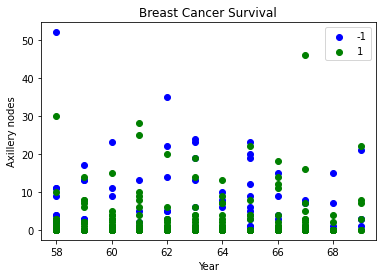

In [8]:
from itertools import cycle

def plot_data(data, w_line=None):
    """
    show data in 2d petal length vs width and target being 1 or -1 (indicating if flower is iris setosa or not.)
    Parameters:
    data: array of type tuple(array[petal_height, petal_width], target) target is either 1 or -1
    w_line: a visual line to seperate the 2 clusters. If none is provided it will not show
    """
    print(data[:10])
    data_points, class_labels = list(zip(*data))
    data_points = np.array(data_points)
    class_labels = np.array(class_labels)

    colors = cycle('bgrcmy')
    for l, col in zip(np.unique(class_labels), colors):
        d =  data_points[class_labels == l]
        x = d[:,0]
        y = d[:,1]
        plt.scatter(d[:,0], d[:,1], c=col, label=l)
    
    if w_line:                  # only plot a division line if one exists
        l = np.linspace(0, 8.5) # 50 evenly spaced numbers for the x axis
        m, b = w_line           # m = slope, b = intercept
        plt.plot(l, m * l + b, 'y-', lw=2) # lw is line width


    plt.title('Breast Cancer Survival')
    plt.xlabel('Year')
    plt.ylabel('Axillery nodes')
    plt.legend()
plot_data(year_ax_training_data)

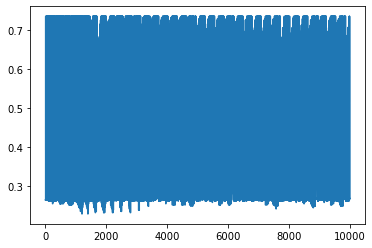

In [18]:

def compute_error_rate(data, model):
    """based on a weight show the error rate 
    as number of wrong predictions relative to all predictions
    
    Parameters:
    data: the training data with input and labels
    model, the weight used in the prediction"""
    
    data_points, class_labels = list(zip(*data))
    data_points = np.array(data_points)
    class_labels = np.array(class_labels)
    
    errors = np.array([predict_with_bias(vec, model) for vec in data_points])
    c_falsy_elements = np.sum(errors != class_labels)
    return c_falsy_elements / len(class_labels)


# Calculate error rates for each weight in the weight history
error_rates = [compute_error_rate(age_year_ax_training_data, i) for i in ayx_weight_history]

plt.plot(error_rates)
plt.show()

slope: [array([-1.03225806, -0.33333333]) -1.0] bias [array([0.05812475, 0.0009082 ]) 0.006895403952180791]
(array([array([-1.03225806, -0.33333333]), -1.0], dtype=object), array([array([0.05812475, 0.0009082 ]), 0.006895403952180791],
      dtype=object))
slope: 0.3715037394686742 bias 0.3359223456291012
[(array([64,  1]), 1), (array([62,  3]), 1), (array([65,  0]), 1), (array([59,  2]), 1), (array([65,  4]), 1), (array([58, 10]), 1), (array([60,  0]), 1), (array([59,  0]), -1), (array([66,  9]), -1), (array([58, 30]), 1)]


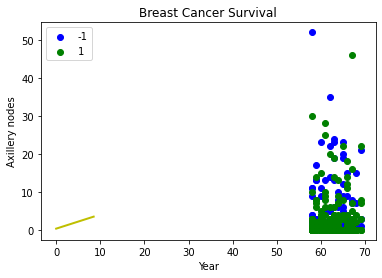

In [10]:
def compute_line(weights):
    """
    Visualizing Linear Separability by using weights/norm(weights) wich are othogonal to the division line.
    Parameters:
    weights: the weights calculated by PLA
    """
    norm = np.linalg.norm(weights) # calculating the frobenius norm adjusting values measured on different scales to a notionally common scale
    ww = weights / norm # weight vector is perpendicular (or othogonal) to the division line
    ww1 = [ww[1], -ww[0]] # first point on our division line
    ww2 = [-ww[1] , ww[0]] # second point on our division line
    # slope and intercept
    m = (ww2[1] - ww1[1]) / (ww2[0] - ww1[0]) # slope = delta y / delta x
    b = ((ww2[0] - ww1[0]) * m) + ww1[1]      # intercept = delta x * slope + y(x1)
    print('slope:',m,'bias',b)
    return m, b


print(compute_line(year_ax_training_data))
plot_data(year_ax_training_data, compute_line(yx_learned_weights))